# Importaciones Generales

#### Se importan las librerias principales para ejecutar el codigo.


In [1]:
"""
Created on Wed Jan 24 08:30:39 2024
@author: JMCasado
"""
#General import
import sys
import os
import argparse
import glob
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import math
import pandas as pd

# Importaciones Locales
### Las librerias internas se importan mediante el uso de from

In [2]:
sys.path.append("../")

import notebook as brl

from data_transform import smooth
from data_export.data_export import DataExport
from data_import.data_import import DataImport
from sound_module.simple_sound import simpleSound
from data_transform.predef_math_functions import PredefMathFunctions

/home/ibio/Escritorio/jupyter-notebook/SDSSspectra/notebook/../data_export/data_export.py:77: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if exception_error.find('No such file or directory') is not -1 or exception_error.find('No existe el archivo o el directorio') is not -1:
/home/ibio/Escritorio/jupyter-notebook/SDSSspectra/notebook/../data_export/data_export.py:77: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if exception_error.find('No such file or directory') is not -1 or exception_error.find('No existe el archivo o el directorio') is not -1:


pygame 2.5.2 (SDL 2.28.2, Python 3.11.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Instanciar las clases necesarias de sonoUno

In [3]:
# Instanciate the sonoUno clases needed
_dataexport = DataExport(False)
_dataimport = DataImport()
_simplesound = simpleSound()
_math = PredefMathFunctions()

In [4]:
plot_flag = True

i = 1
if plot_flag:
    # Create an empty figure or plot to save it
    cm = 1/2.54  # centimeters in inches
    #fig = plt.figure(figsize=(15*cm, 10*cm), dpi=300)
    fig = plt.figure()
    # Defining the axes so that we can plot data into it.
    #ax = plt.axes()
#Inits to generalize

<Figure size 640x480 with 0 Axes>

# Configuración del sonido, predefinida en el momento.

In [5]:
_simplesound.reproductor.set_continuous()
_simplesound.reproductor.set_waveform('celesta') # piano; sine
_simplesound.reproductor.set_time_base(0.01)
_simplesound.reproductor.set_min_freq(300)
_simplesound.reproductor.set_max_freq(1500)

In [6]:
# Loop to walk the directory and sonify each data file
now = datetime.datetime.now()
print(now.strftime('%Y-%m-%d_%H-%M-%S'))

2024-08-23_15-38-16


# Se inserta un archivo de ejemplo

#### En este caso se escribe en el path los ejemplos que se encuentran en la carpeta data_stars

In [7]:
# Open each file
ext = 'txt'

data1, status, msg = _dataimport.set_arrayfromfile("../data_stars/O5.txt", ext)
data2, status, msg = _dataimport.set_arrayfromfile("../data_stars/A5.txt", ext)
data3, status, msg = _dataimport.set_arrayfromfile("../data_stars/G0.txt", ext)
data4, status, msg = _dataimport.set_arrayfromfile("../data_stars/star-x.txt", ext)
# Convert into numpy, split in x and y and normalyze
if data1.shape[1]<2:
    print("Error reading file 1, only detect one column.")
    exit()
if data2.shape[1]<2:
    print("Error reading file 2, only detect one column.")
    exit()
if data3.shape[1]<2:
    print("Error reading file 3, only detect one column.")
    exit()
if data4.shape[1]<2:
    print("Error reading file 4, only detect one column.")
    exit()
# Extract the names and turn to float
data_float1 = data1.iloc[1:, 1:].astype(float)
data_float2 = data2.iloc[1:, 1:].astype(float)
data_float3 = data3.iloc[1:, 1:].astype(float)
data_float4 = data4.iloc[1:, 1:].astype(float)

# Inicializamos la posición para no tener error cuando no haya recortes

In [8]:
x_pos_min = 0

# Cut first data set
abs_val_array = np.abs(data_float1.loc[:,1] - 3700)
x_pos_min = abs_val_array.idxmin()
abs_val_array = np.abs(data_float1.loc[:,1] - 4700)
x_pos_max = abs_val_array.idxmin()
data_float1 = data1.iloc[x_pos_min:x_pos_max, :].astype(float)
# Cut second data set
data_float2 = data2.iloc[x_pos_min:x_pos_max, :].astype(float)
# Cut third data set
data_float3 = data3.iloc[x_pos_min:x_pos_max, :].astype(float)
# Cut fourth data set
data_float4 = data4.iloc[x_pos_min:x_pos_max, :].astype(float)


# Mostrar los graficos superpuestos
### Se crean a partir de los ejemplos anteriores

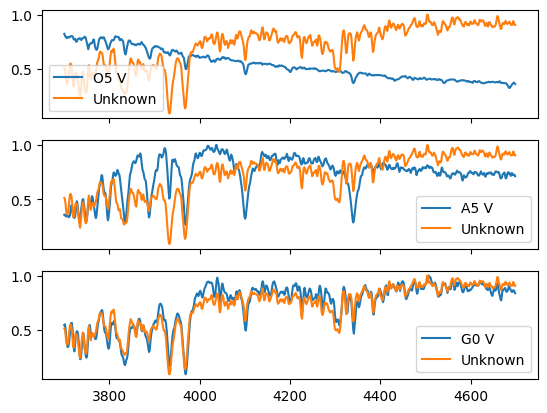

In [9]:
path1 = 'data_stars/'
plot_flag = True
if plot_flag:
    # Configure axis, plot the data and save it
    # Erase the plot
    #ax.cla()
    # First file of the column is setted as axis name
    #x_name = str(data1.iloc[0,0])
    #ax.set_xlabel(x_name)
    # Separate the name file from the path to set the plot title
    #head, tail = os.path.split(filename)
    #ax.plot(data_float1.loc[:,0], data_float1.loc[:,1], label='Flux-Barred spiral')
    #ax.plot(data_float1.loc[:,0], data_float1.loc[:,2], label='Best Fit')
    #ax.plot(data_float1.loc[:,0], data_float1.loc[:,3], label='Sky Flux')
    #ax.plot(data_float2.loc[:,0], data_float2.loc[:,1], label='Flux-Double nucleus')
    
    #First plot
    ax1 = plt.subplot(311)      #ax = plt.subplot(111) para un solo plot
    ax1.plot(data_float1.loc[:,1], data_float1.loc[:,2], label='O5 V')
    ax1.plot(data_float4.loc[:,1], data_float4.loc[:,2], label='Unknown')
    #plt.tick_params('x', labelsize=6)
    ax1.tick_params('x', labelbottom=False)

    # Second plot
    ax2 = plt.subplot(312, sharex=ax1)
    ax2.plot(data_float2.loc[:,1], data_float2.loc[:,2], label='A5 V')
    ax2.plot(data_float4.loc[:,1], data_float4.loc[:,2], label='Unknown')
    # make these tick labels invisible
    ax2.tick_params('x', labelbottom=False)

    # Third plot
    ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
    ax3.plot(data_float3.loc[:,1], data_float3.loc[:,2], label='G0 V')
    ax3.plot(data_float4.loc[:,1], data_float4.loc[:,2], label='Unknown')
    
    ax1.legend()
    ax2.legend()
    ax3.legend()
    plt.pause(0.05)
    # Set the path to save the plot and save it
    plot_path = path1[:-6] + 'plot.png'
    fig.savefig(plot_path)

In [10]:
# Reproduction
# Normalize the data to sonify
x1, y1, status = _math.normalize(data_float1.loc[:,1], data_float1.loc[:,2], init=x_pos_min)
x2, y2, status = _math.normalize(data_float2.loc[:,1], data_float2.loc[:,2], init=x_pos_min)
x3, y3, status = _math.normalize(data_float3.loc[:,1], data_float3.loc[:,2], init=x_pos_min)
x4, y4, status = _math.normalize(data_float4.loc[:,1], data_float4.loc[:,2], init=x_pos_min)

# Reproduction
minval1 = float(data_float1.loc[:,2].min())
maxval1 = float(data_float1.loc[:,2].max())
minval2 = float(data_float2.loc[:,2].min())
maxval2 = float(data_float2.loc[:,2].max())
minval3 = float(data_float3.loc[:,2].min())
maxval3 = float(data_float3.loc[:,2].max())
minval4 = float(data_float4.loc[:,2].min())
maxval4 = float(data_float4.loc[:,2].max())

# To make reproduction on real time
ordenada1 = np.array([min(minval1,minval4), max(maxval1,maxval4)])
ordenada2 = np.array([min(minval2,minval4), max(maxval2,maxval4)])
ordenada3 = np.array([min(minval3,minval4), max(maxval3,maxval4)])

# Reproducimos el sonido de los graficos.

In [ ]:
for i in range (1, 4):
    print(i)
    for x in range (x_pos_min, x_pos_max):
        if i==1:
            # Plot the position line
            if not x == x_pos_min:
                line = red_line.pop(0)
                line.remove()
            abscisa = np.array([float(data_float1.loc[x,1]), float(data_float1.loc[x,1])])
            red_line = ax1.plot(abscisa, ordenada1, 'r')
            plt.pause(0.05)
            # Make the sound
            _simplesound.reproductor.set_waveform('sine')
            _simplesound.make_sound(y1[x], 1)
            _simplesound.reproductor.set_waveform('flute')
            _simplesound.make_sound(y4[x], 1)
            if x == (x_pos_max-1):
                line = red_line.pop(0)
                line.remove()
        if i==2:
            # Plot the position line
            if not x == x_pos_min:
                line = red_line.pop(0)
                line.remove()
            abscisa = np.array([float(data_float1.loc[x,1]), float(data_float1.loc[x,1])])
            red_line = ax2.plot(abscisa, ordenada2, 'r')
            plt.pause(0.05)
            # Make the sound
            _simplesound.reproductor.set_waveform('sine')
            _simplesound.make_sound(y2[x], 1)
            _simplesound.reproductor.set_waveform('flute')
            _simplesound.make_sound(y4[x], 1)
            if x == (x_pos_max-1):
                line = red_line.pop(0)
                line.remove()
        if i==3:
            # Plot the position line
            if not x == x_pos_min:
                line = red_line.pop(0)
                line.remove()
            abscisa = np.array([float(data_float1.loc[x,1]), float(data_float1.loc[x,1])])
            red_line = ax3.plot(abscisa, ordenada3, 'r')
            plt.pause(0.05)
            # Make the sound
            _simplesound.reproductor.set_waveform('sine')
            _simplesound.make_sound(y3[x], 1)
            _simplesound.reproductor.set_waveform('flute')
            _simplesound.make_sound(y4[x], 1)
            if x == (x_pos_max-1):
                line = red_line.pop(0)
                line.remove()

1
2


# Guardado de audio

In [ ]:
wav_name1 = path1[:-6] + 'O5-unknown.wav'
wav_name2 = path1[:-6] + 'A5-unknown.wav'
wav_name3 = path1[:-6] + 'G0-unknown.wav'
_simplesound.save_sound_multicol_stars(wav_name1, data_float1.loc[:,1], y1, y4, init=x_pos_min) 
#_simplesound.save_sound(wav_name1, data_float1.loc[:,1], data_float1.loc[:,2], init=x_pos_min)
_simplesound.save_sound_multicol_stars(wav_name2, data_float1.loc[:,1], y2, y4, init=x_pos_min)
_simplesound.save_sound_multicol_stars(wav_name3, data_float1.loc[:,1], y3, y4, init=x_pos_min)
# Print time
now = datetime.datetime.now()
print(now.strftime('%Y-%m-%d_%H-%M-%S'))

plt.pause(0.5)
# Showing the above plot
plt.show()
plt.close()